<h1 style='text-align:center'>Data set Test</h1>

In [1]:

# LECTURA DE LOS DATOS 
# "Brachidontes.csv"  data frame heterogéneo: 
#       Estacion           Lugar  Id longitud ancho  alto peso.hum peso.sin.val
#      invierno    MDQ 1 Jul-15   1    10.19  9.69  8.16   0.8140       0.2110
library(stats)
library(dplyr)
library("ggplot2")
data <- read.csv(file="brachidontes_final_2.csv", header=TRUE, sep=",")
head(data)
#print(length(data))
#print(class(data))
#print(dim(data))


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


,Estacion,lugar,n_sitio,Id,longitud,ancho,alto,peso_hum,peso_sin_val,peso_seco,peso_seco_vis,peso_sec_val,longitu_menor_4mm,X
,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<lgl>
1,invierno,MDQ,parche 1,1,9.61,4.51,3.44,0.100,0.021,0.0653,0.0068,0.0585,200,NA
2,invierno,MDQ,parche 1,2,10.77,4.58,3.56,0.112,0.024,0.0854,0.0089,0.0765,200,NA
3,invierno,MDQ,parche 1,3,10.59,5.93,4.54,0.191,0.042,0.0935,0.0097,0.0838,200,NA
4,invierno,MDQ,parche 1,4,11.90,6.45,4.42,0.184,0.045,0.1000,0.0104,0.0896,200,NA
5,invierno,MDQ,parche 1,5,10.39,5.10,4.17,0.134,0.019,0.0535,0.0056,0.0479,200,NA
6,invierno,MDQ,parche 1,6,11.17,4.40,3.42,0.154,0.010,0.0683,0.0071,0.0612,200,NA


<h1 style='text-align:center'>MDQ:</h1>
<h3>Shapiro-Wilk test</h3>

In [2]:
MDQ <- filter(data, peso_seco_vis > 0 & grepl('MDQ', data$lugar))
#test 
#variable = peso_seco_vis
#factor = 'invierno',verano
tapply(MDQ$peso_seco_vis, MDQ$Estacion,shapiro.test )
#se rechaza la hipotesis nula --> Es normal la distribución? En los dos casos el 'p-value' es menor a 0.05
#por lo que las distribuciones no son normales

$invierno

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.90881, p-value < 2.2e-16


$primavera

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.62281, p-value < 2.2e-16



In [3]:
MDQ <- filter(data, peso_seco_vis > 0 & grepl('MDQ', data$lugar))
#test 
#variable = peso_seco_vis
#factor = 'invierno',verano
tapply(MDQ$longitud, MDQ$Estacion,shapiro.test )
#se rechaza la hipotesis nula --> Es normal la distribución? En los dos casos el 'p-value' es menor a 0.05
#por lo que las distribuciones no son normales

$invierno

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.98217, p-value = 2.039e-08


$primavera

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.92907, p-value < 2.2e-16



<h3>QQ-plots</h3>
Un gráfico Cuantil-Cuantil permite observar cuan cerca está la
distribución de un conjunto de datos a alguna distribución ideal
ó comparar la distribución de dos conjuntos de datos. 

La función qqnorm genera un gráfico Q-Q que compara los cuantiles de nuestros datos (sample quantiles) con los cuantiles teóricos (theoretical quantiles) de la distribución normal estándar, N(0, 1).

La función qqline superpone una línea que nos ayuda a evaluar la relación lineal de las dos distribuciones. Esta línea, que por defecto cruza los puntos del primer (0,25) y el tercer cuartil (0,75), es una aproximación robusta de los valores esperados de nuestros datos si siguieran una distribución normal estándar. Si los datos se alejan de esta línea, especialmente cerca del centro, nos sugeriría que nuestros datos no se distribuyen normalmente.

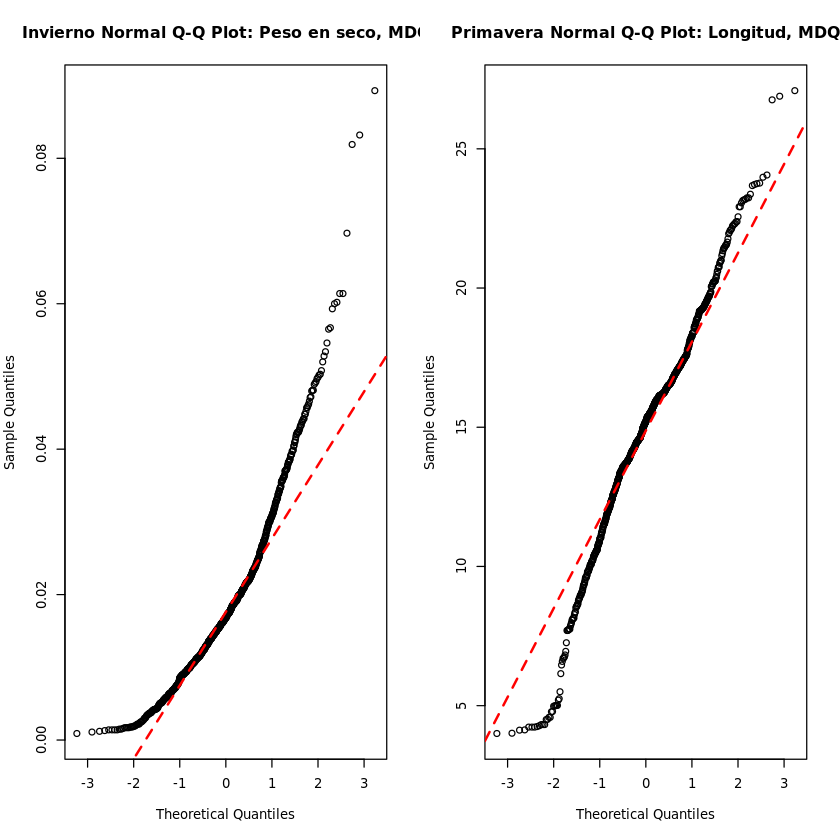

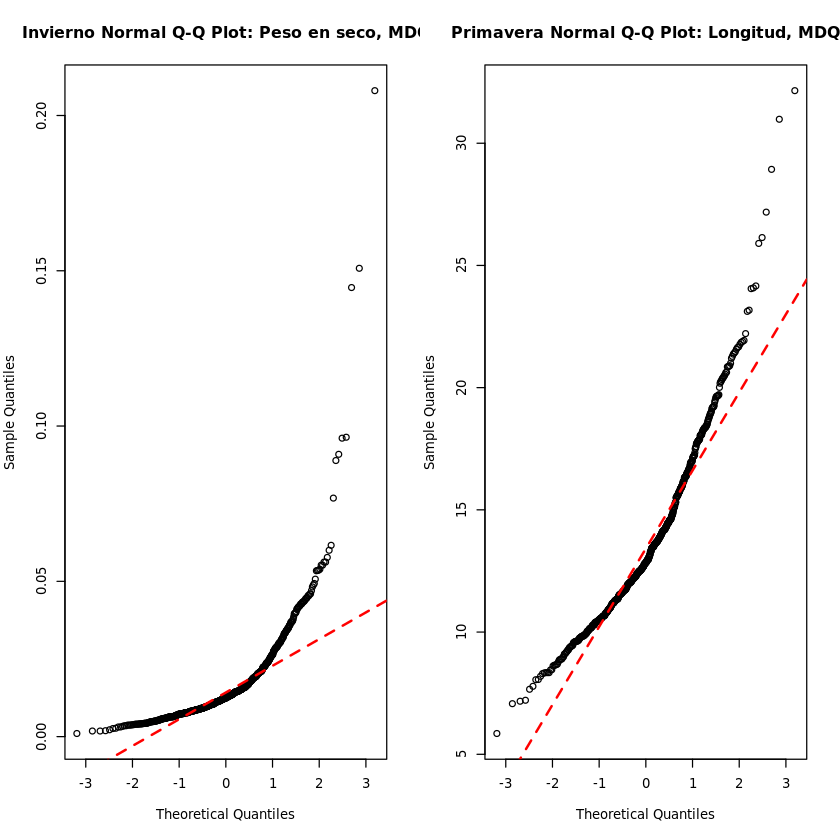

In [4]:
invierno <- filter(data, peso_seco_vis > 0 & grepl('MDQ', data$lugar) & Estacion=="invierno")
layout(matrix(c(1,1,2,2), nrow = 1, ncol = 4, byrow = TRUE))
qqnorm(invierno$peso_seco_vis,main="Invierno Normal Q-Q Plot: Peso en seco, MDQ")
qqline(invierno$peso_seco_vis,col = 2,lwd=2,lty=2)
qqnorm(invierno$longitud,main="Primavera Normal Q-Q Plot: Longitud, MDQ")
qqline(invierno$longitud,col = 2,lwd=2,lty=2)

primavera <- filter(data, peso_seco_vis > 0 & grepl('MDQ', data$lugar) & Estacion=="primavera")
layout(matrix(c(1,1,2,2), nrow = 1, ncol = 4, byrow = TRUE))
qqnorm(primavera$peso_seco_vis,main="Invierno Normal Q-Q Plot: Peso en seco, MDQ")
qqline(primavera$peso_seco_vis,col = 2,lwd=2,lty=2)
qqnorm(primavera$longitud,main="Primavera Normal Q-Q Plot: Longitud, MDQ")
qqline(primavera$longitud,col = 2,lwd=2,lty=2)

<h1 style='text-align:center'>QQ:</h1>
<h3>Shapiro-Wilk test</h3>

In [5]:
QQ <- filter(data, peso_seco_vis > 0 & grepl('QQ', data$lugar))
#test 
#variable = peso_seco_vis
#factor = 'invierno',verano
tapply(QQ$peso_seco_vis, QQ$Estacion,shapiro.test )
#se rechaza la hipotesis nula --> Es normal la distribución? En los dos casos el 'p-value' es menor a 0.05
#por lo que las distribuciones no son normales

$invierno

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.82198, p-value < 2.2e-16


$primavera

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.89696, p-value < 2.2e-16



In [6]:
QQ <- filter(data, peso_seco_vis > 0 & grepl('QQ', data$lugar))
#test 
#variable = peso_seco_vis
#factor = 'invierno',verano
tapply(MDQ$longitud, MDQ$Estacion,shapiro.test )
#se rechaza la hipotesis nula --> Es normal la distribución? En los dos casos el 'p-value' es menor a 0.05
#por lo que las distribuciones no son normales

$invierno

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.98217, p-value = 2.039e-08


$primavera

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.92907, p-value < 2.2e-16



<h3>QQ-plots</h3>
Un gráfico Cuantil-Cuantil permite observar cuan cerca está la
distribución de un conjunto de datos a alguna distribución ideal
ó comparar la distribución de dos conjuntos de datos. 

La función qqnorm genera un gráfico Q-Q que compara los cuantiles de nuestros datos (sample quantiles) con los cuantiles teóricos (theoretical quantiles) de la distribución normal estándar, N(0, 1).

La función qqline superpone una línea que nos ayuda a evaluar la relación lineal de las dos distribuciones. Esta línea, que por defecto cruza los puntos del primer (0,25) y el tercer cuartil (0,75), es una aproximación robusta de los valores esperados de nuestros datos si siguieran una distribución normal estándar. Si los datos se alejan de esta línea, especialmente cerca del centro, nos sugeriría que nuestros datos no se distribuyen normalmente.

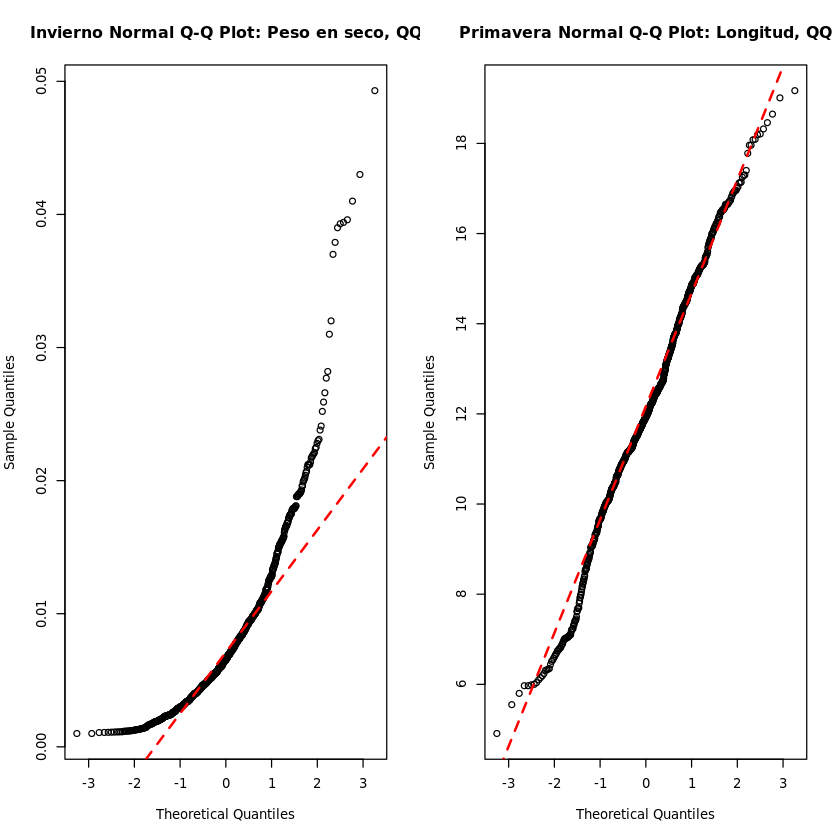

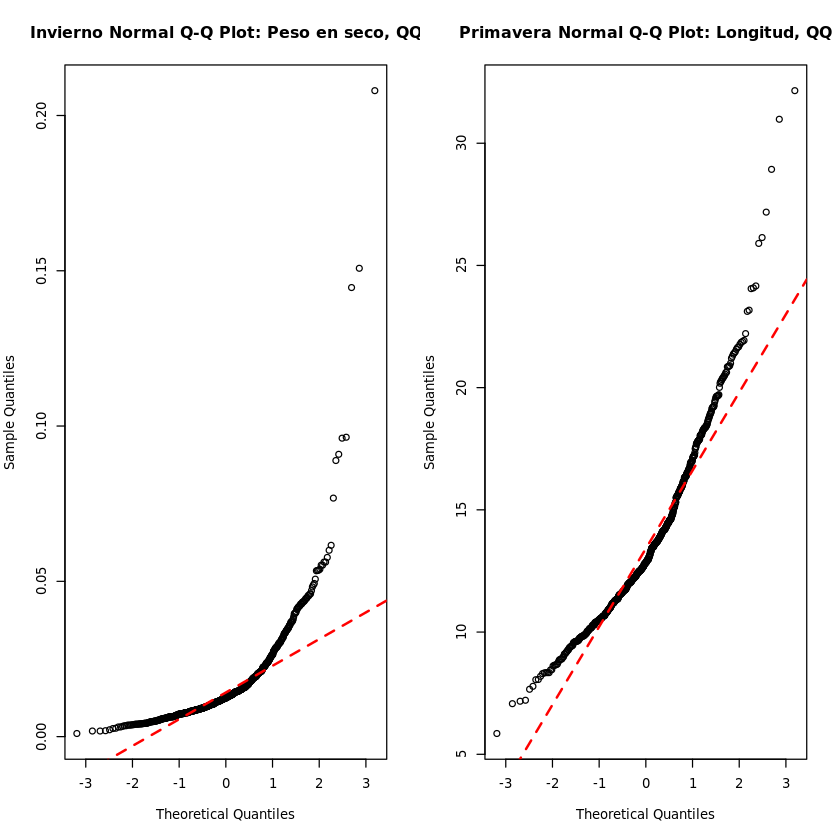

In [8]:
invierno <- filter(data, peso_seco_vis > 0 & grepl('QQ', data$lugar) & Estacion=="invierno")
layout(matrix(c(1,1,2,2), nrow = 1, ncol = 4, byrow = TRUE))
qqnorm(invierno$peso_seco_vis,main="Invierno Normal Q-Q Plot: Peso en seco, QQ")
qqline(invierno$peso_seco_vis,col = 2,lwd=2,lty=2)
qqnorm(invierno$longitud,main="Primavera Normal Q-Q Plot: Longitud, QQ")
qqline(invierno$longitud,col = 2,lwd=2,lty=2)

primavera <- filter(data, peso_seco_vis > 0 & grepl('MDQ', data$lugar) & Estacion=="primavera")
layout(matrix(c(1,1,2,2), nrow = 1, ncol = 4, byrow = TRUE))
qqnorm(primavera$peso_seco_vis,main="Invierno Normal Q-Q Plot: Peso en seco, QQ")
qqline(primavera$peso_seco_vis,col = 2,lwd=2,lty=2)
qqnorm(primavera$longitud,main="Primavera Normal Q-Q Plot: Longitud, QQ")
qqline(primavera$longitud,col = 2,lwd=2,lty=2)

<h1 style='text-align:center'>CAM:</h1>
<h3>Shapiro-Wilk test</h3>

In [10]:
CAM <- filter(data, peso_seco_vis > 0 & grepl('CAM', data$lugar))
#test 
#variable = peso_seco_vis
#factor = 'invierno',verano
tapply(CAM$peso_seco_vis, CAM$Estacion,shapiro.test )
#se rechaza la hipotesis nula --> Es normal la distribución? En los dos casos el 'p-value' es menor a 0.05
#por lo que las distribuciones no son normales

$invierno

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.82155, p-value < 2.2e-16


$primavera

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.82181, p-value < 2.2e-16



In [11]:
CAM <- filter(data, peso_seco_vis > 0 & grepl('CAM', data$lugar))
#test 
#variable = peso_seco_vis
#factor = 'invierno',verano
tapply(CAM$longitud, CAM$Estacion,shapiro.test )
#se rechaza la hipotesis nula --> Es normal la distribución? En los dos casos el 'p-value' es menor a 0.05
#por lo que las distribuciones no son normales

$invierno

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.9589, p-value = 8.847e-08


$primavera

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.96229, p-value = 8.856e-10



<h3>QQ-plots</h3>
Un gráfico Cuantil-Cuantil permite observar cuan cerca está la
distribución de un conjunto de datos a alguna distribución ideal
ó comparar la distribución de dos conjuntos de datos. 

La función qqnorm genera un gráfico Q-Q que compara los cuantiles de nuestros datos (sample quantiles) con los cuantiles teóricos (theoretical quantiles) de la distribución normal estándar, N(0, 1).

La función qqline superpone una línea que nos ayuda a evaluar la relación lineal de las dos distribuciones. Esta línea, que por defecto cruza los puntos del primer (0,25) y el tercer cuartil (0,75), es una aproximación robusta de los valores esperados de nuestros datos si siguieran una distribución normal estándar. Si los datos se alejan de esta línea, especialmente cerca del centro, nos sugeriría que nuestros datos no se distribuyen normalmente.

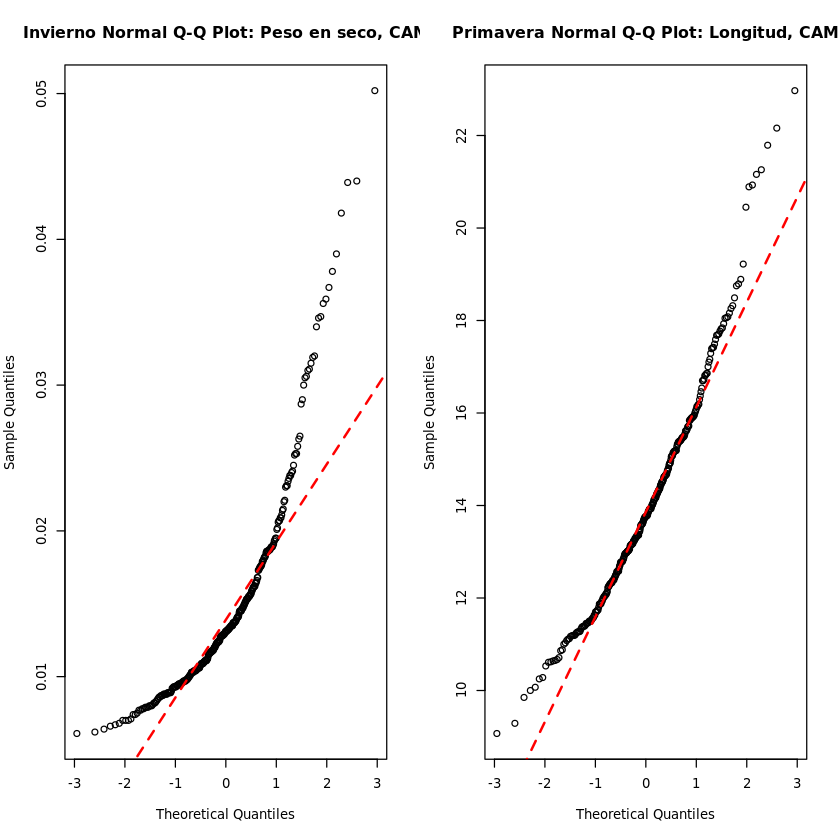

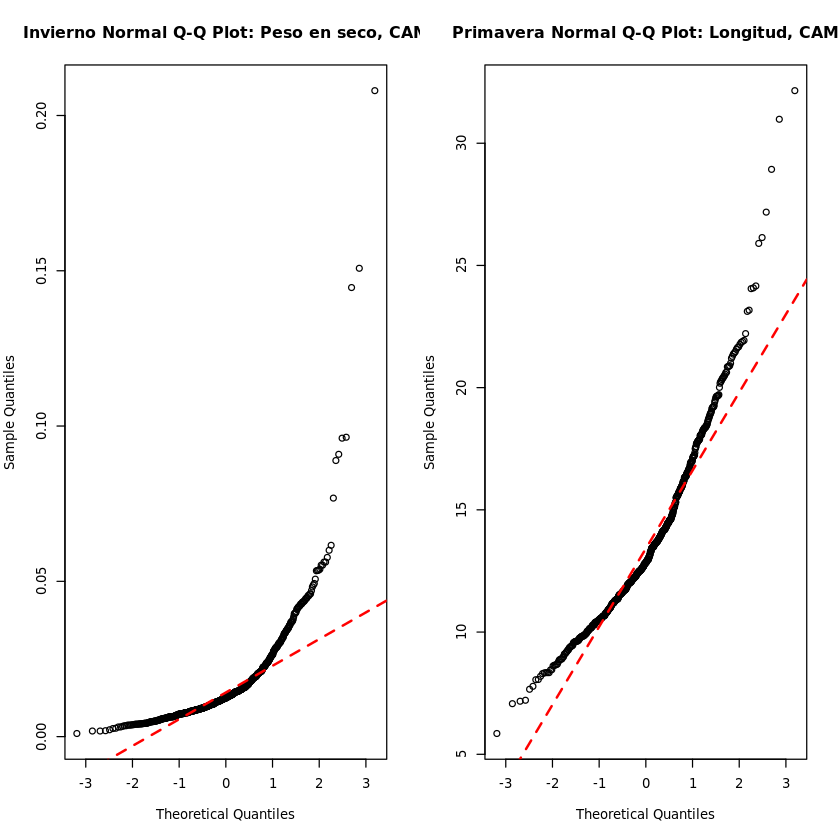

In [13]:
invierno <- filter(data, peso_seco_vis > 0 & grepl('CAM', data$lugar) & Estacion=="invierno")
layout(matrix(c(1,1,2,2), nrow = 1, ncol = 4, byrow = TRUE))
qqnorm(invierno$peso_seco_vis,main="Invierno Normal Q-Q Plot: Peso en seco, CAM")
qqline(invierno$peso_seco_vis,col = 2,lwd=2,lty=2)
qqnorm(invierno$longitud,main="Primavera Normal Q-Q Plot: Longitud, CAM")
qqline(invierno$longitud,col = 2,lwd=2,lty=2)

primavera <- filter(data, peso_seco_vis > 0 & grepl('MDQ', data$lugar) & Estacion=="primavera")
layout(matrix(c(1,1,2,2), nrow = 1, ncol = 4, byrow = TRUE))
qqnorm(primavera$peso_seco_vis,main="Invierno Normal Q-Q Plot: Peso en seco, CAM")
qqline(primavera$peso_seco_vis,col = 2,lwd=2,lty=2)
qqnorm(primavera$longitud,main="Primavera Normal Q-Q Plot: Longitud, CAM")
qqline(primavera$longitud,col = 2,lwd=2,lty=2)

<h1 style='text-align:center'>BARC:</h1>
<h3>Shapiro-Wilk test</h3>

In [15]:
BARC <- filter(data, peso_seco_vis > 0 & grepl('BARC', data$lugar))
#test 
#variable = peso_seco_vis
#factor = 'invierno',verano
tapply(BARC$peso_seco_vis, BARC$Estacion,shapiro.test )
#se rechaza la hipotesis nula --> Es normal la distribución? En los dos casos el 'p-value' es menor a 0.05
#por lo que las distribuciones no son normales

$invierno

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.90975, p-value < 2.2e-16


$primavera
NULL


<h3>QQ-plots</h3>
Un gráfico Cuantil-Cuantil permite observar cuan cerca está la
distribución de un conjunto de datos a alguna distribución ideal
ó comparar la distribución de dos conjuntos de datos. 

La función qqnorm genera un gráfico Q-Q que compara los cuantiles de nuestros datos (sample quantiles) con los cuantiles teóricos (theoretical quantiles) de la distribución normal estándar, N(0, 1).

La función qqline superpone una línea que nos ayuda a evaluar la relación lineal de las dos distribuciones. Esta línea, que por defecto cruza los puntos del primer (0,25) y el tercer cuartil (0,75), es una aproximación robusta de los valores esperados de nuestros datos si siguieran una distribución normal estándar. Si los datos se alejan de esta línea, especialmente cerca del centro, nos sugeriría que nuestros datos no se distribuyen normalmente.

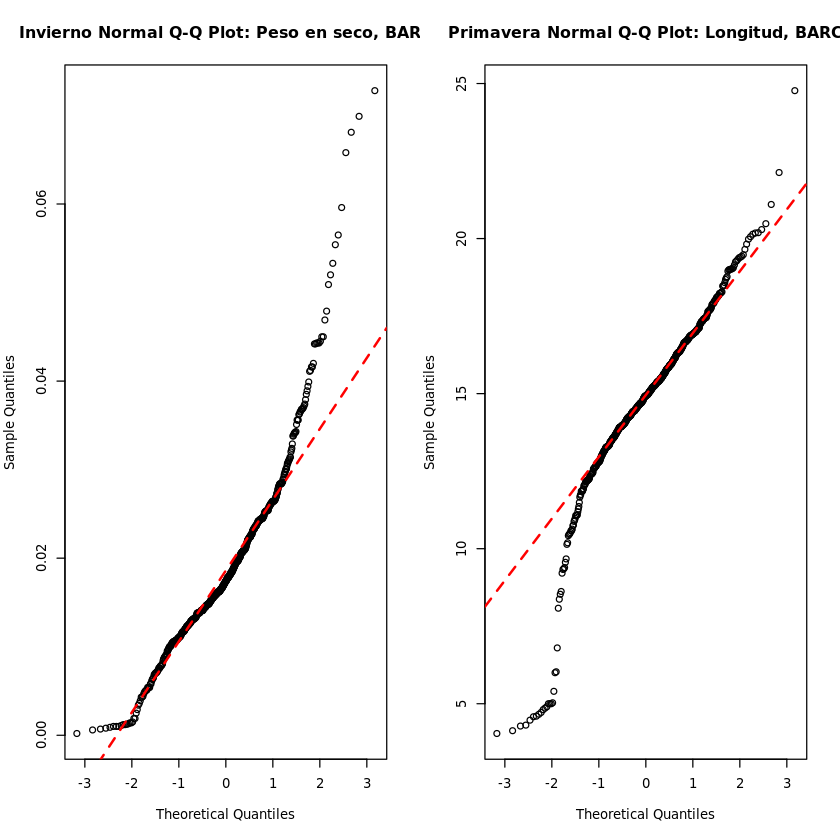

In [16]:
invierno <- filter(data, peso_seco_vis > 0 & grepl('BARC', data$lugar) & Estacion=="invierno")
layout(matrix(c(1,1,2,2), nrow = 1, ncol = 4, byrow = TRUE))
qqnorm(invierno$peso_seco_vis,main="Invierno Normal Q-Q Plot: Peso en seco, BARC")
qqline(invierno$peso_seco_vis,col = 2,lwd=2,lty=2)
qqnorm(invierno$longitud,main="Primavera Normal Q-Q Plot: Longitud, BARC")
qqline(invierno$longitud,col = 2,lwd=2,lty=2)

